In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import sys
sys.path.append(os.path.expanduser('~/rds/rds-dsk-lab-eWkDxBhxBrQ/dimorl/code/mopo'))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.constants import FIG_DIR
from dogo.results import get_scores_df

In [26]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [29]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-HC-M_10000", "D4RL: M"),
    ("D4RL-HC-ME_10000", "D4RL: ME"),
    ("D4RL-HC-MR_10000", "D4RL: MR"),
    ("D4RL-HC-R_10000", "D4RL: R"),
    ("RAND-1_10000", "Random 1"),
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

training_datasets_labels = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "2M Steps"),
]
training_datasets = [i[0] for i in training_datasets_labels]
training_labels = [i[1] for i in training_datasets_labels]

experiments_01_steps = ['MP473', 'MP474', 'MP475']
experiments_02_steps = ['MP476', 'MP477', 'MP478']
experiments_05_steps = ['MP479', 'MP480', 'MP481']
experiments_1_steps  = ['MP482', 'MP483', 'MP484']
experiments_2_steps  = ['MP536', 'MP537', 'MP538']

# Dynamics models with less training performed
experiments_01_steps_lt = ['MP449', 'MP450', 'MP451']
experiments_02_steps_lt = ['MP452', 'MP453', 'MP454']
experiments_05_steps_lt = ['MP455', 'MP456', 'MP457']
experiments_1_steps_lt  = ['MP458', 'MP459', 'MP460']
experiments_2_steps_lt = ['MP533', 'MP534', 'MP535']

labels = ['0.1M Steps', '0.2M Steps', '0.5M Steps', '1M Steps', '2M Steps']

In [5]:
# evaluation_datasets = [
#     "D3RLPY-RT-0.1M-1-P0_100000",
#     "D3RLPY-RT-0.2M-1-P0_100000",
#     "D3RLPY-RT-0.5M-1-P0_100000",
#     "D3RLPY-RT-1M-1-P0_100000",
#     "D3RLPY-RT-2M-1-P0_100000",
#     "D4RL-HC-M_100000",
#     "D4RL-HC-ME_100000",
#     "D4RL-HC-MR_100000",
#     "D4RL-HC-R_100000",
#     "SAC-RT-0.1M-0-P0_100000",
#     "SAC-RT-0.25M-1-P0_100000",
#     "SAC-RT-0.5M-1-P0_100000",
#     "SAC-RT-1M-1-P0_100000",
#     "SAC-RT-2M-1-P0_100000",
#     "SAC-RT-3M-1-P0_100000",
#     "RAND-1",
#     "RAND-2",
#     "RAND-3",
# ]

# training_datasets = [
#     "D3RLPY-RT-0.1M-1-P0_100000",
#     "D3RLPY-RT-0.2M-1-P0_100000",
#     "D3RLPY-RT-0.5M-1-P0_100000",
#     "D3RLPY-RT-1M-1-P0_100000",
#     "D3RLPY-RT-2M-1-P0_100000",
# ]

# experiments_01_steps = ['MP473', 'MP474', 'MP475']
# experiments_02_steps = ['MP476', 'MP477', 'MP478']
# experiments_05_steps = ['MP479', 'MP480', 'MP481']
# experiments_1_steps  = ['MP482', 'MP483', 'MP484']
# experiments_2_steps  = ['MP536', 'MP537', 'MP538']

# labels = ['0.1M Steps', '0.2M Steps', '0.5M Steps', '1M Steps', '2M Steps']

In [6]:
scores_01_steps_df = get_scores_df(experiments_01_steps, evaluation_datasets)
scores_02_steps_df = get_scores_df(experiments_02_steps, evaluation_datasets)
scores_05_steps_df = get_scores_df(experiments_05_steps, evaluation_datasets)
scores_1_steps_df = get_scores_df(experiments_1_steps, evaluation_datasets)
scores_2_steps_df = get_scores_df(experiments_2_steps, evaluation_datasets)

In [7]:
scores_01_steps_df_lt = get_scores_df(experiments_01_steps_lt, evaluation_datasets)
scores_02_steps_df_lt = get_scores_df(experiments_02_steps_lt, evaluation_datasets)
scores_05_steps_df_lt = get_scores_df(experiments_05_steps_lt, evaluation_datasets)
scores_1_steps_df_lt = get_scores_df(experiments_1_steps_lt, evaluation_datasets)
scores_2_steps_df_lt = get_scores_df(experiments_2_steps_lt, evaluation_datasets)

In [8]:
scores_01_steps_groups = (
    scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_01_steps_avgs_df = scores_01_steps_groups.mean().reset_index()
scores_01_steps_mins_df = scores_01_steps_groups.min().reset_index()
scores_01_steps_maxs_df = scores_01_steps_groups.max().reset_index()

scores_02_steps_groups = (
    scores_02_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_02_steps_avgs_df = scores_02_steps_groups.mean().reset_index()
scores_02_steps_mins_df = scores_02_steps_groups.min().reset_index()
scores_02_steps_maxs_df = scores_02_steps_groups.max().reset_index()

scores_05_steps_groups = (
    scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_05_steps_avgs_df = scores_05_steps_groups.mean().reset_index()
scores_05_steps_mins_df = scores_05_steps_groups.min().reset_index()
scores_05_steps_maxs_df = scores_05_steps_groups.max().reset_index()

scores_1_steps_groups = (
    scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_1_steps_avgs_df = scores_1_steps_groups.mean().reset_index()
scores_1_steps_mins_df = scores_1_steps_groups.min().reset_index()
scores_1_steps_maxs_df = scores_1_steps_groups.max().reset_index()

scores_2_steps_groups = (
    scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_2_steps_avgs_df = scores_2_steps_groups.mean().reset_index()
scores_2_steps_mins_df = scores_2_steps_groups.min().reset_index()
scores_2_steps_maxs_df = scores_2_steps_groups.max().reset_index()

In [9]:
scores_01_steps_groups_lt = (
    scores_01_steps_df_lt.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_01_steps_avgs_df_lt = scores_01_steps_groups_lt.mean().reset_index()
scores_01_steps_mins_df_lt = scores_01_steps_groups_lt.min().reset_index()
scores_01_steps_maxs_df_lt = scores_01_steps_groups_lt.max().reset_index()

scores_02_steps_groups_lt = (
    scores_02_steps_df_lt.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_02_steps_avgs_df_lt = scores_02_steps_groups_lt.mean().reset_index()
scores_02_steps_mins_df_lt = scores_02_steps_groups_lt.min().reset_index()
scores_02_steps_maxs_df_lt = scores_02_steps_groups_lt.max().reset_index()

scores_05_steps_groups_lt = (
    scores_05_steps_df_lt.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_05_steps_avgs_df_lt = scores_05_steps_groups_lt.mean().reset_index()
scores_05_steps_mins_df_lt = scores_05_steps_groups_lt.min().reset_index()
scores_05_steps_maxs_df_lt = scores_05_steps_groups_lt.max().reset_index()

scores_1_steps_groups_lt = (
    scores_1_steps_df_lt.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_1_steps_avgs_df_lt = scores_1_steps_groups_lt.mean().reset_index()
scores_1_steps_mins_df_lt = scores_1_steps_groups_lt.min().reset_index()
scores_1_steps_maxs_df_lt = scores_1_steps_groups_lt.max().reset_index()

scores_2_steps_groups_lt = (
    scores_2_steps_df_lt.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_2_steps_avgs_df_lt = scores_2_steps_groups_lt.mean().reset_index()
scores_2_steps_mins_df_lt = scores_2_steps_groups_lt.min().reset_index()
scores_2_steps_maxs_df_lt = scores_2_steps_groups_lt.max().reset_index()

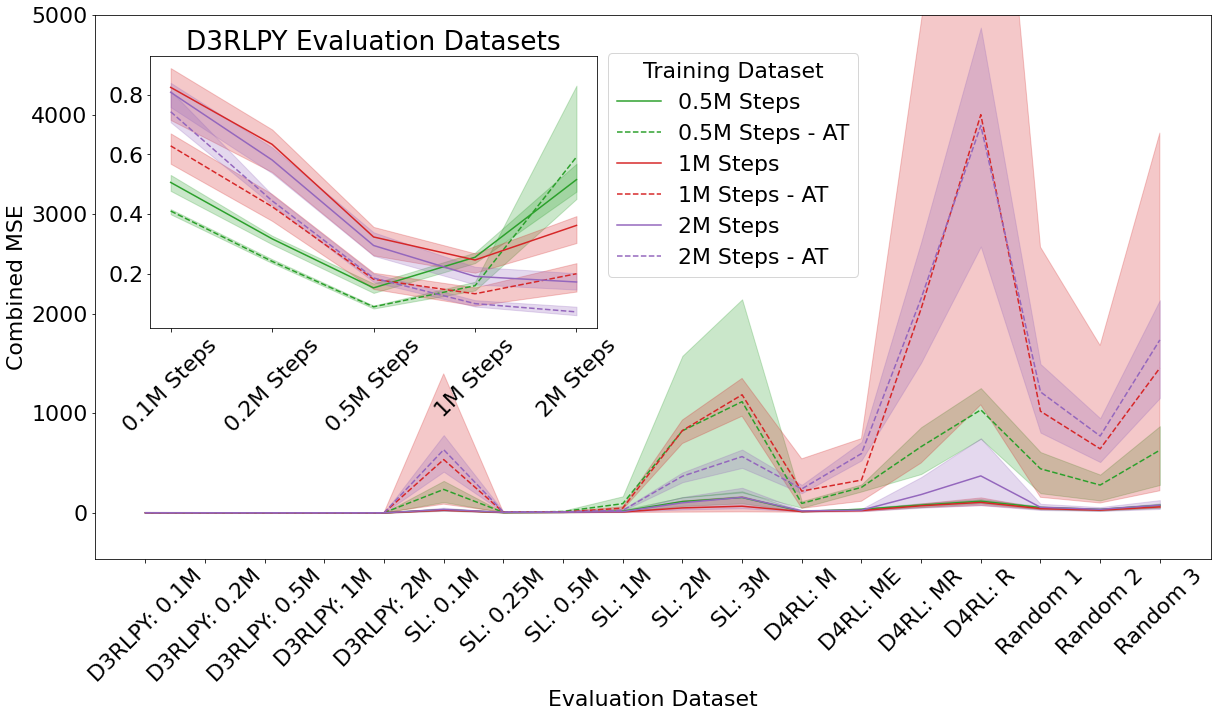

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ins = ax.inset_axes([0.05,0.425,0.4,0.5])

metric = 'overall_mse'
custom_labels = ['0.5M Steps', '0.5M Steps - AT', '1M Steps', '1M Steps - AT', '2M Steps', '2M Steps - AT']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt, 2, '-'),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '--'),
    (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt, 3, '-'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '--'),
    (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt, 4, '-'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=custom_labels[i], c=cols[col_id], ls=ls)
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ins.plot(training_datasets, plot_avgs, label=custom_labels[i], c=cols[col_id], ls=ls)
    ins.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])


ins.set_xticks(ins.get_xticks(), training_labels, rotation=45)
ins.set_title('D3RLPY Evaluation Datasets')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylim(None, 5000)
ax.set_ylabel('Combined MSE')
ax.legend(title='Training Dataset', loc='upper left', bbox_to_anchor=(0.45,0.95))
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_0.1M_at_overall_mse.png'), pad_inches=0.2, bbox_inches='tight')

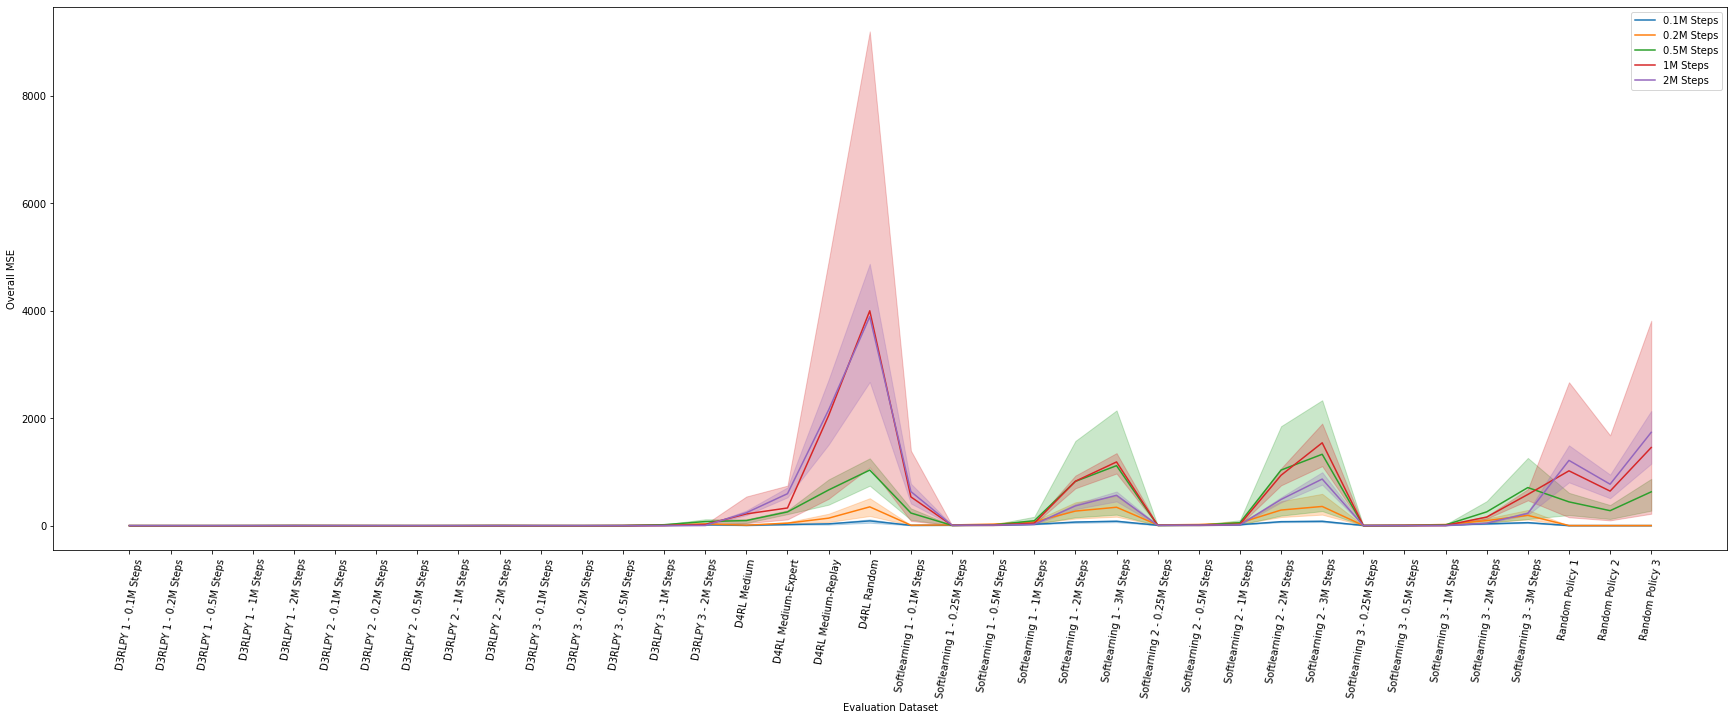

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

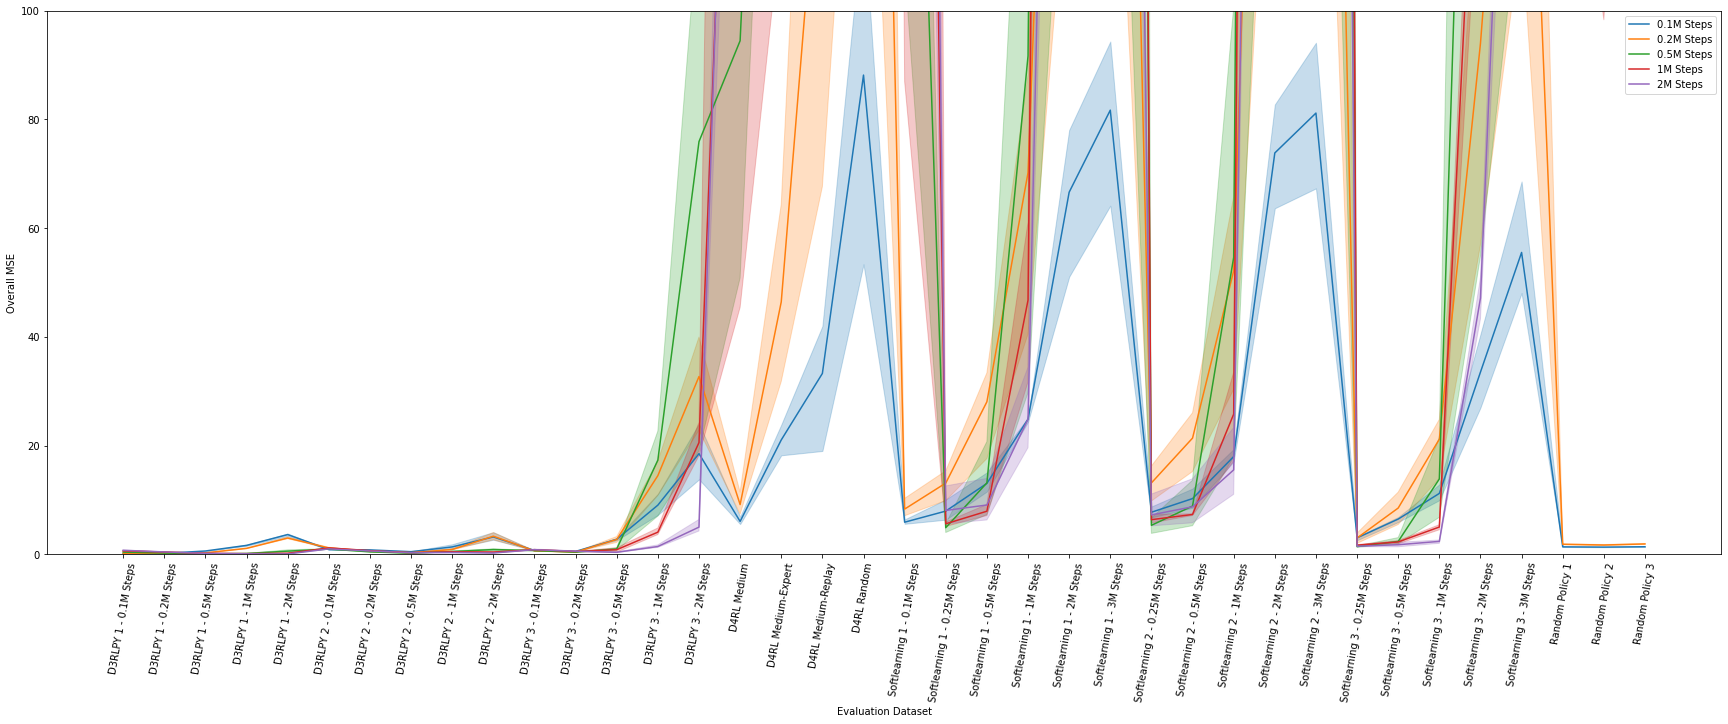

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0, 100)
ax.legend()

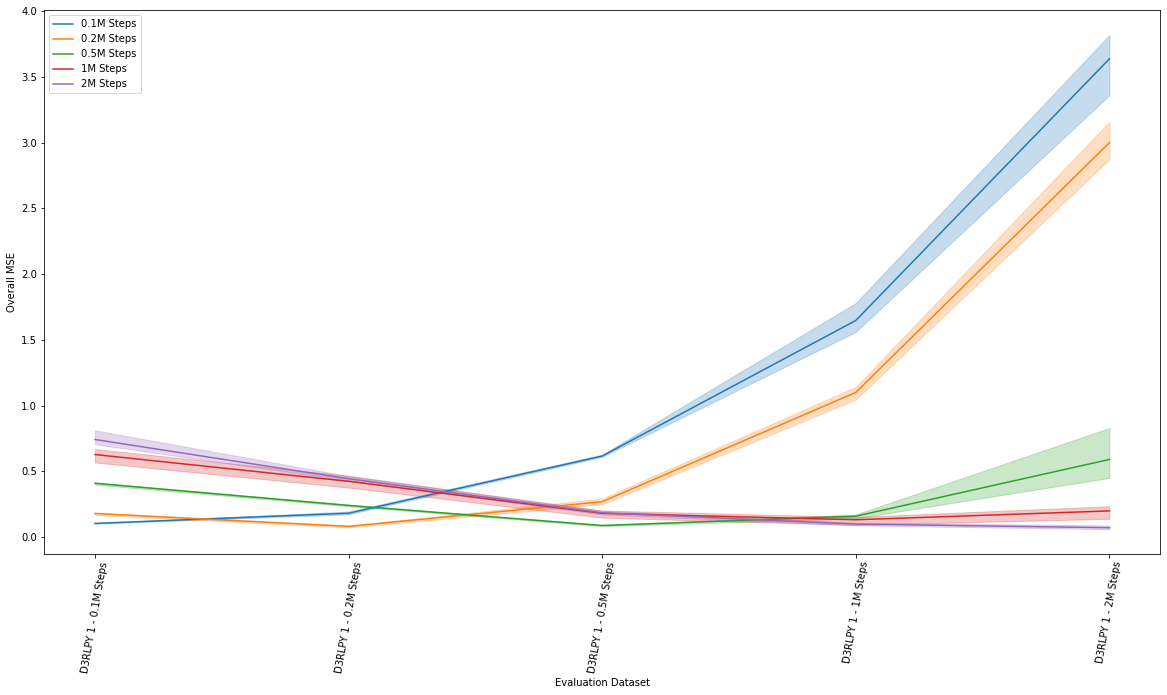

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

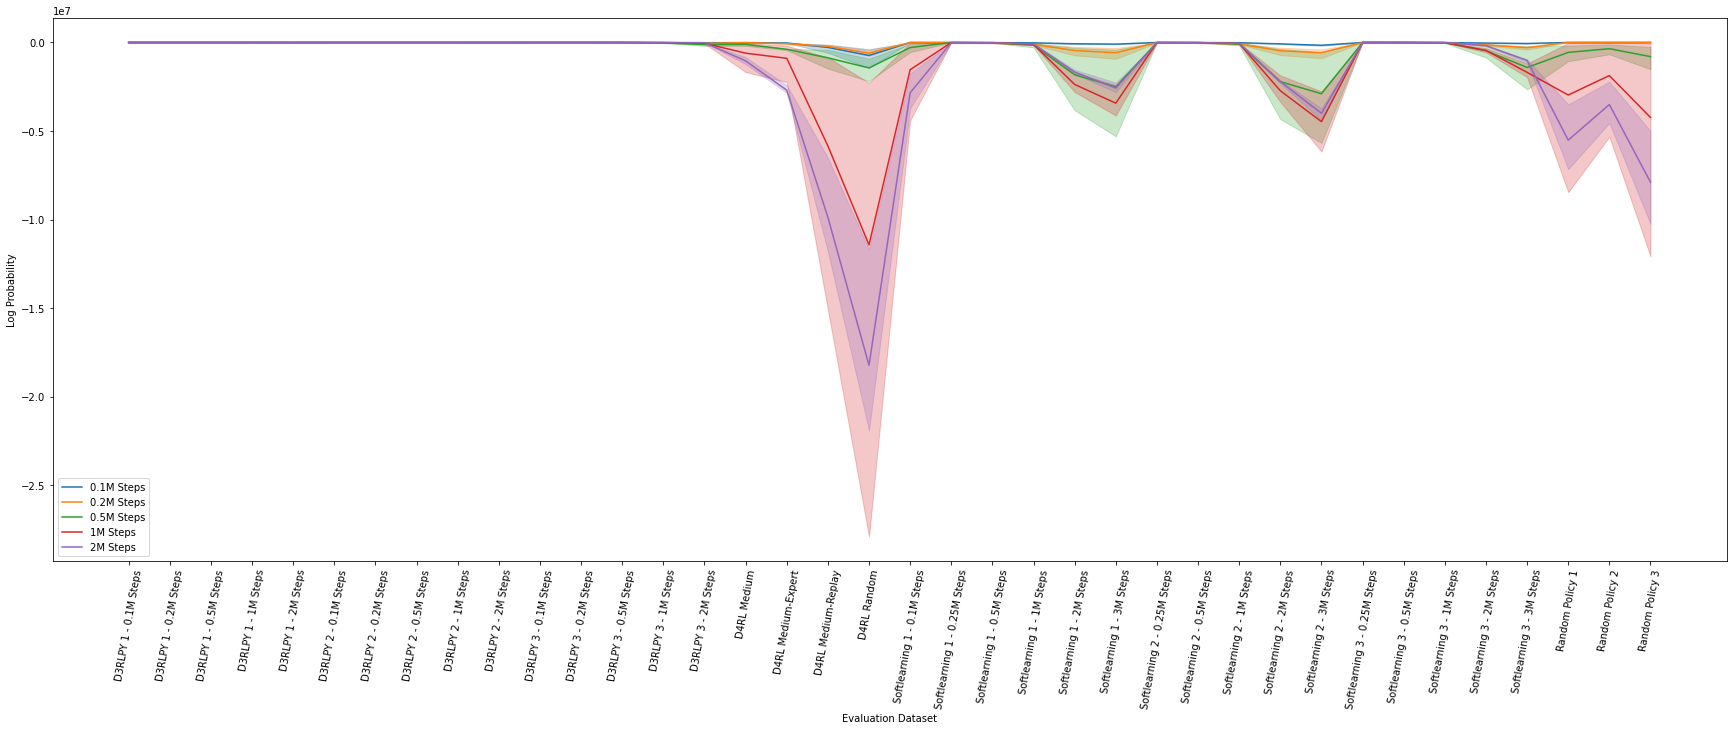

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

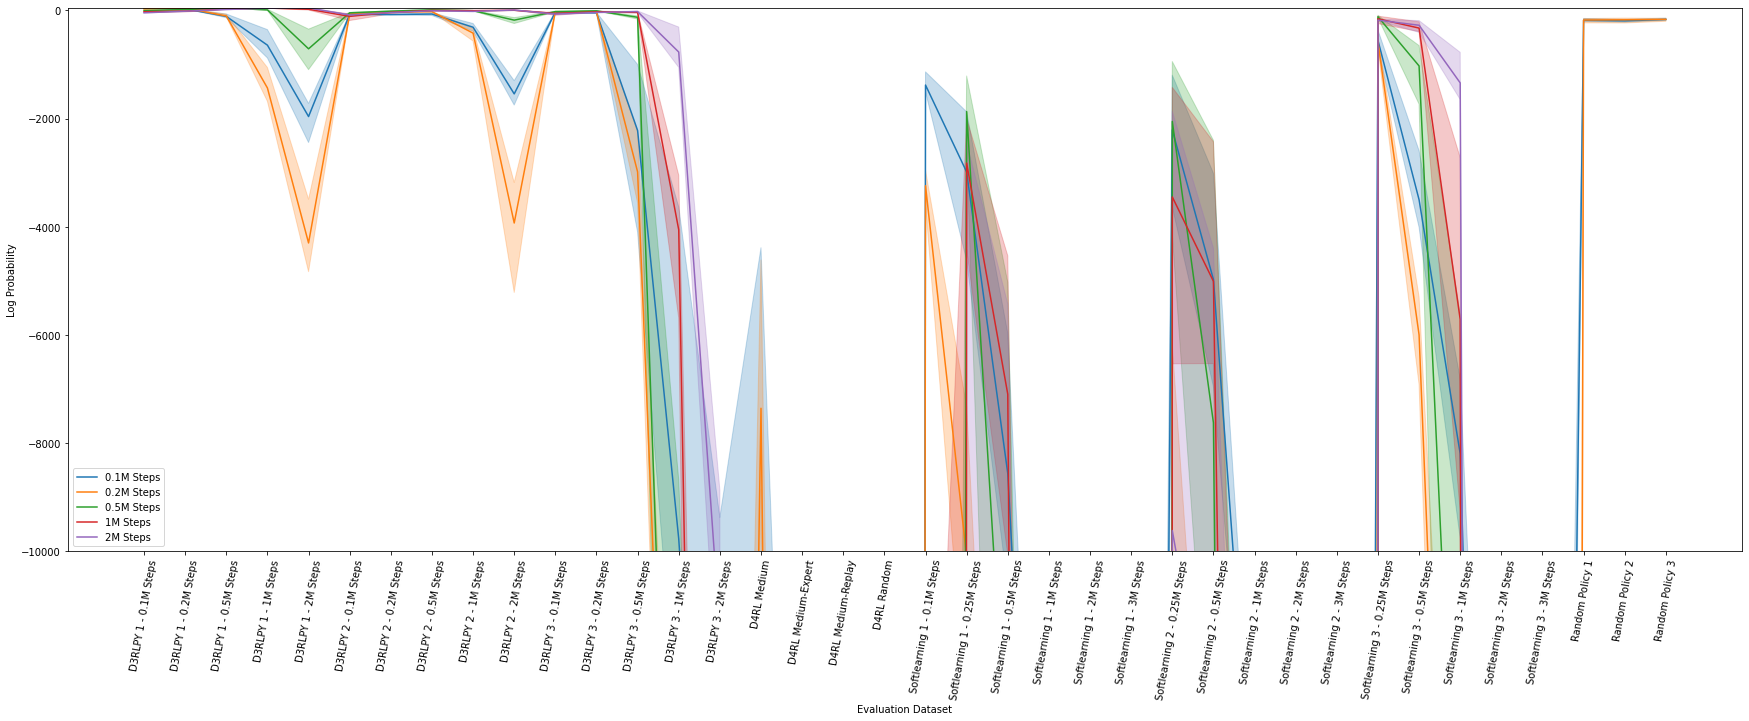

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-10000,50)
ax.legend()

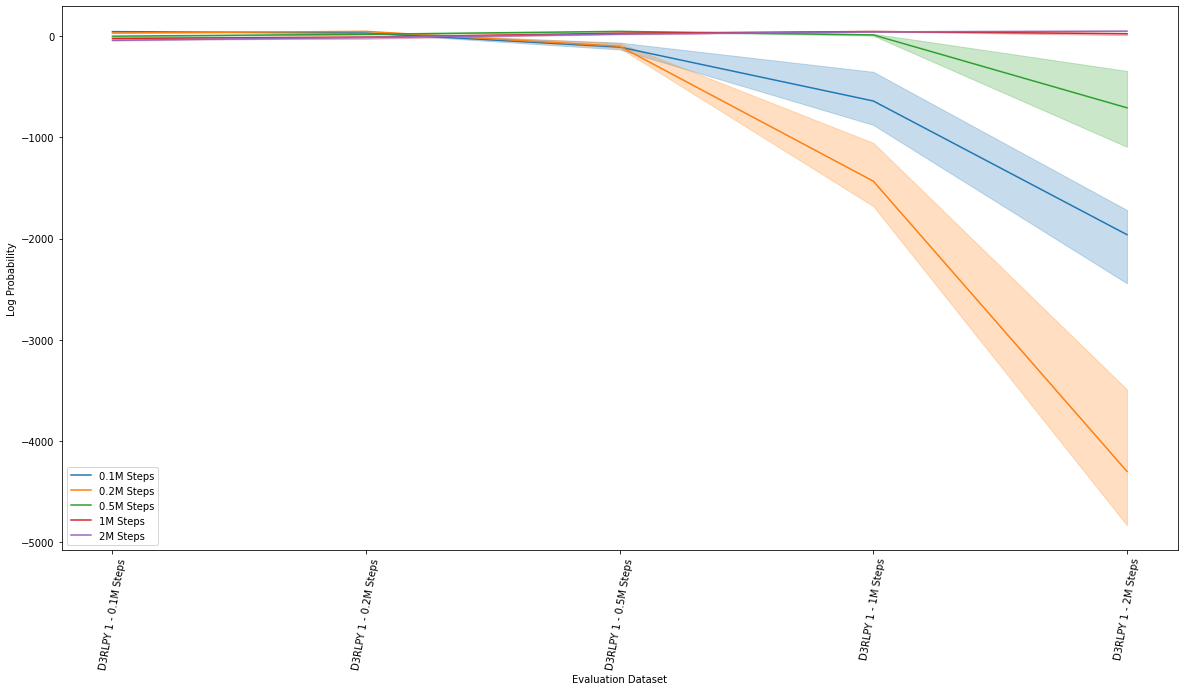

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.legend()

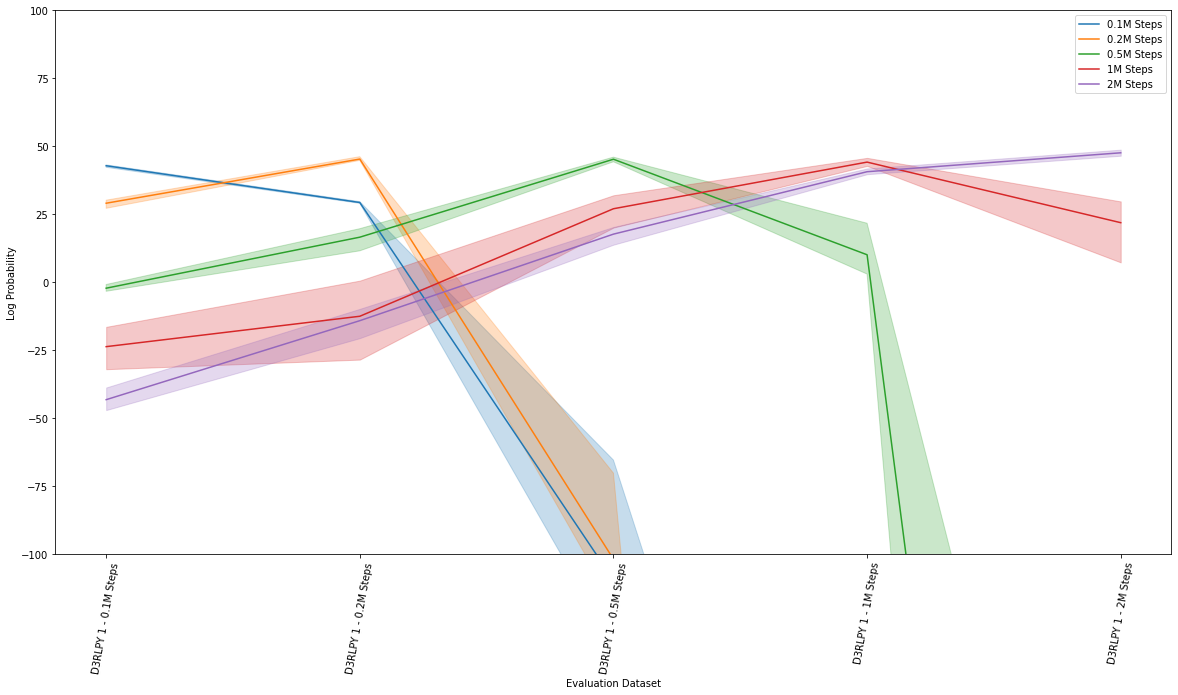

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-100,100)
ax.legend()

# Comparison With Less Trained Agent

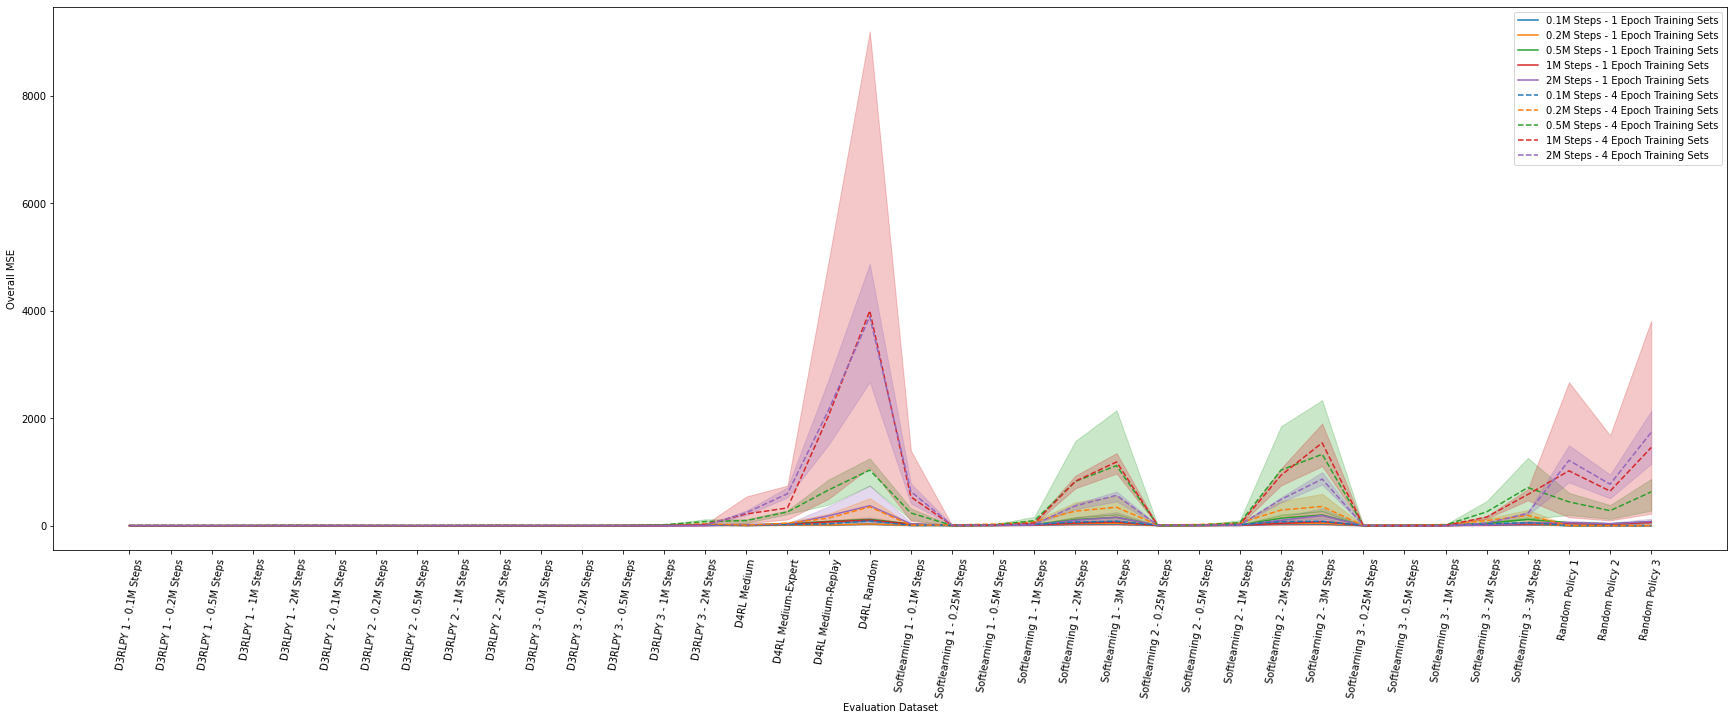

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for j, exp_group in enumerate([
    [
        (scores_01_steps_avgs_df_lt, scores_01_steps_mins_df_lt, scores_01_steps_maxs_df_lt),
        (scores_02_steps_avgs_df_lt, scores_02_steps_mins_df_lt, scores_02_steps_maxs_df_lt),
        (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt),
        (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt),
        (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt),
    ],
    [
        (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
        (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
        (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
        (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
        (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
    ],
]):
    for i, (exp_avgs, exp_mins, exp_maxs) in enumerate(exp_group):
        plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        ax.plot(evaluation_datasets, plot_avgs, label=f'{labels[i]} - {1 if j==0 else 4} Epoch Training Sets', c=cols[i], ls=lss[j])
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

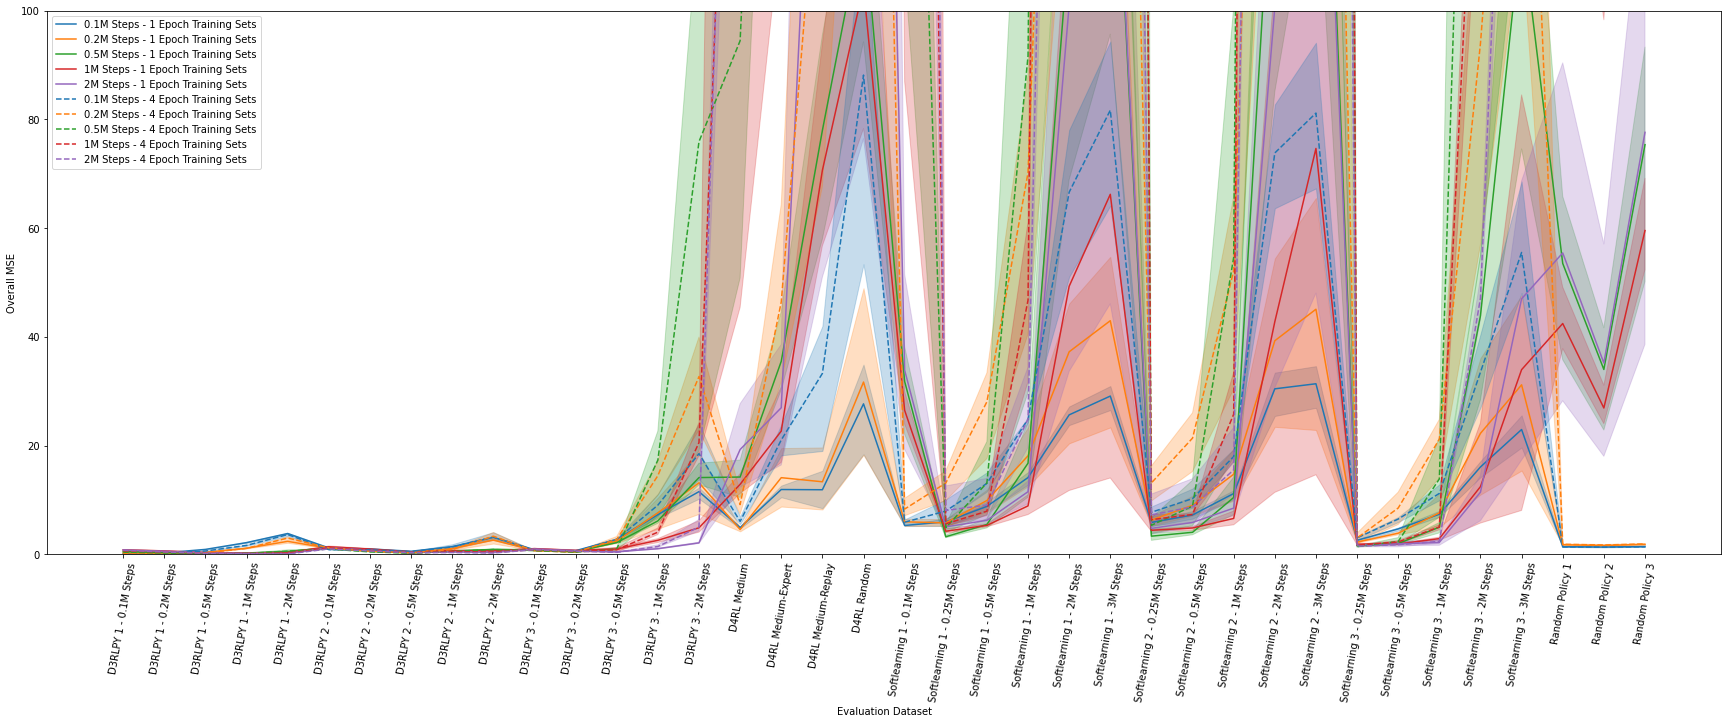

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'overall_mse'
for j, exp_group in enumerate([
    [
        (scores_01_steps_avgs_df_lt, scores_01_steps_mins_df_lt, scores_01_steps_maxs_df_lt),
        (scores_02_steps_avgs_df_lt, scores_02_steps_mins_df_lt, scores_02_steps_maxs_df_lt),
        (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt),
        (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt),
        (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt),
    ],
    [
        (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
        (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
        (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
        (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
        (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
    ],
]):
    for i, (exp_avgs, exp_mins, exp_maxs) in enumerate(exp_group):
        plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        ax.plot(evaluation_datasets, plot_avgs, label=f'{labels[i]} - {1 if j==0 else 4} Epoch Training Sets', c=cols[i], ls=lss[j])
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0,100)
ax.legend()

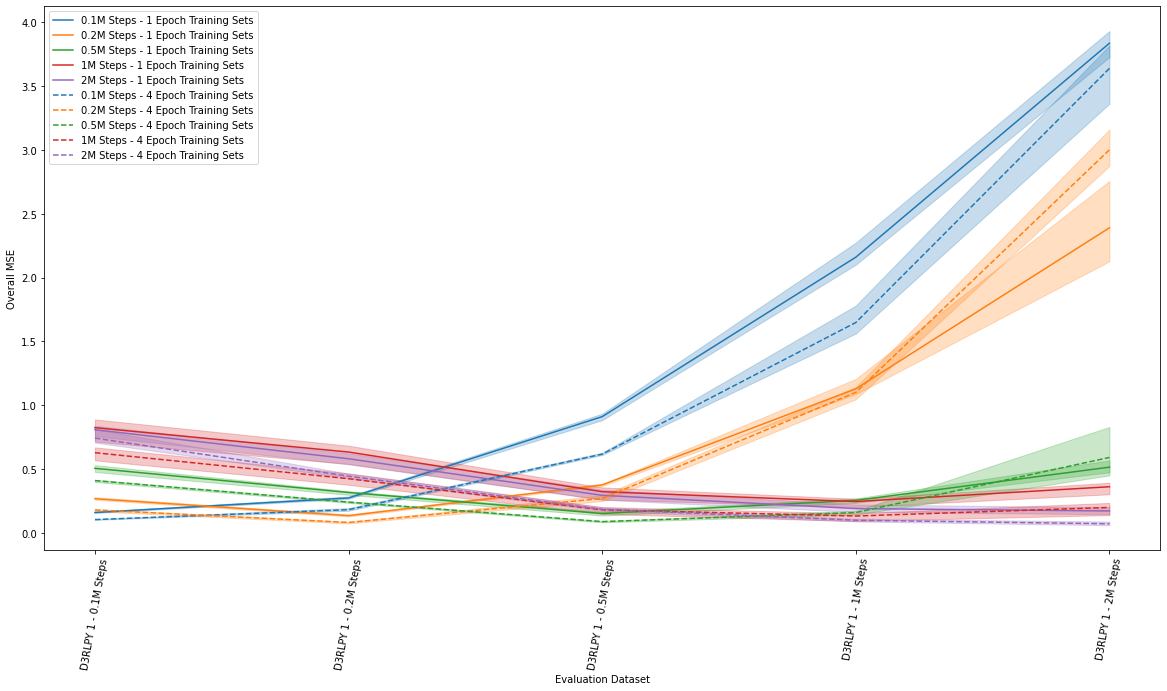

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'overall_mse'
for j, exp_group in enumerate([
    [
        (scores_01_steps_avgs_df_lt, scores_01_steps_mins_df_lt, scores_01_steps_maxs_df_lt),
        (scores_02_steps_avgs_df_lt, scores_02_steps_mins_df_lt, scores_02_steps_maxs_df_lt),
        (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt),
        (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt),
        (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt),
    ],
    [
        (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
        (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
        (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
        (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
        (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
    ],
]):
    for i, (exp_avgs, exp_mins, exp_maxs) in enumerate(exp_group):
        plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
        plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
        plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
        ax.plot(training_datasets, plot_avgs, label=f'{labels[i]} - {1 if j==0 else 4} Epoch Training Sets', c=cols[i], ls=lss[j])
        ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

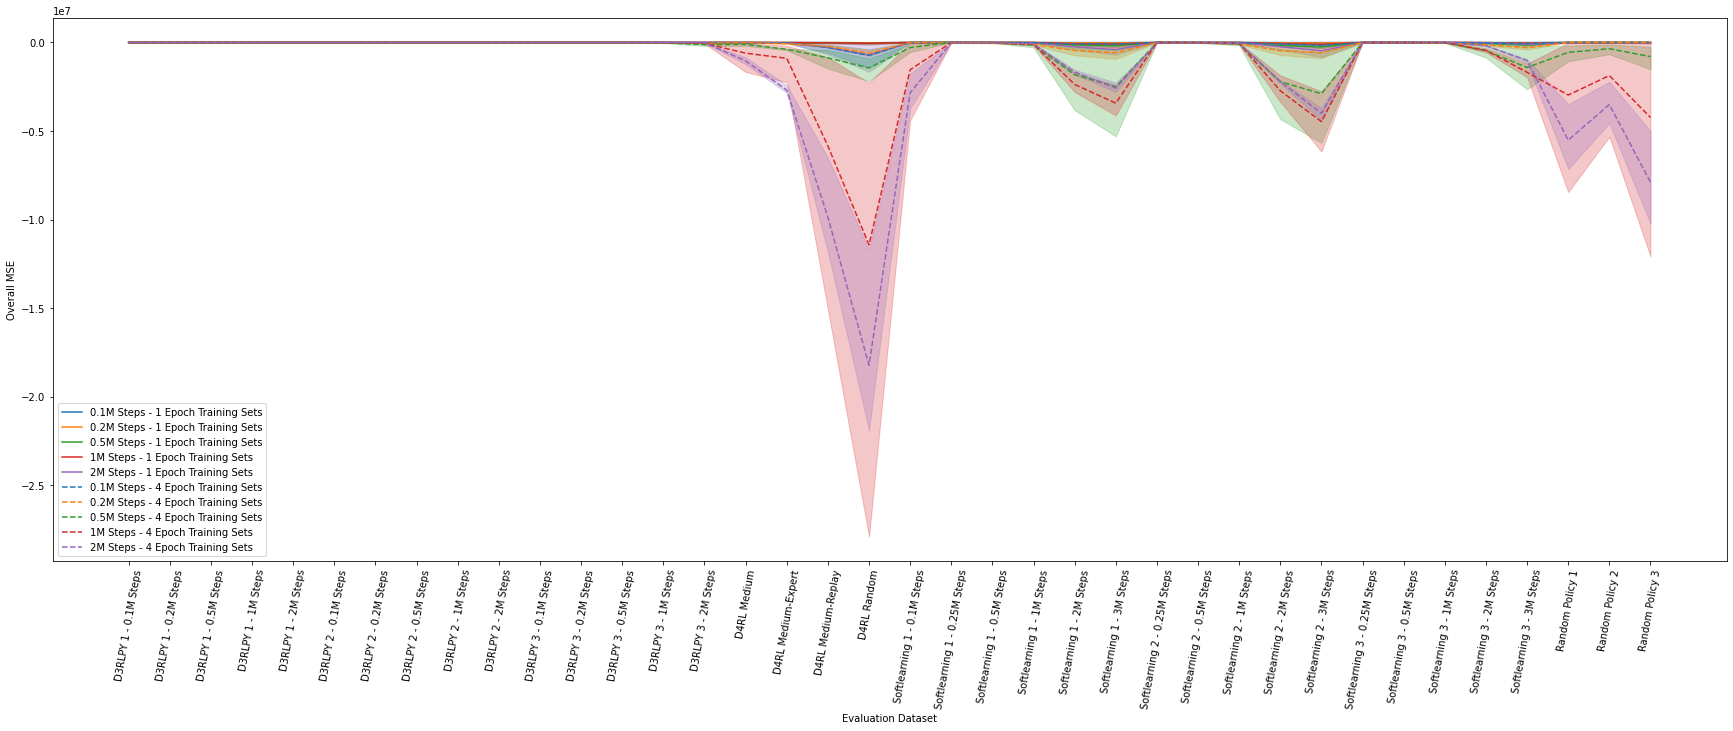

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for j, exp_group in enumerate([
    [
        (scores_01_steps_avgs_df_lt, scores_01_steps_mins_df_lt, scores_01_steps_maxs_df_lt),
        (scores_02_steps_avgs_df_lt, scores_02_steps_mins_df_lt, scores_02_steps_maxs_df_lt),
        (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt),
        (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt),
        (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt),
    ],
    [
        (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
        (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
        (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
        (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
        (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
    ],
]):
    for i, (exp_avgs, exp_mins, exp_maxs) in enumerate(exp_group):
        plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        ax.plot(evaluation_datasets, plot_avgs, label=f'{labels[i]} - {1 if j==0 else 4} Epoch Training Sets', c=cols[i], ls=lss[j])
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.legend()

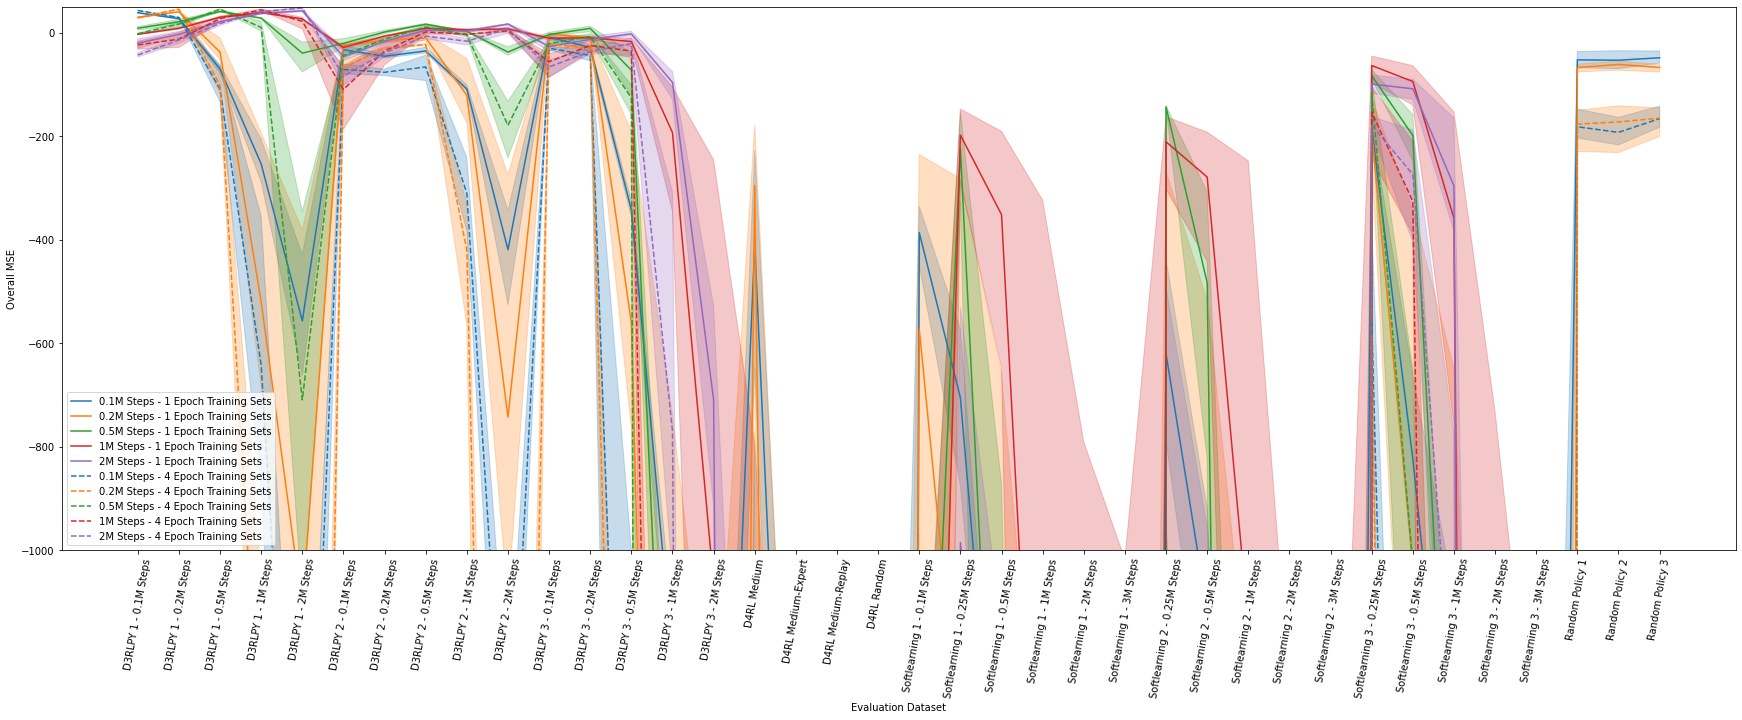

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for j, exp_group in enumerate([
    [
        (scores_01_steps_avgs_df_lt, scores_01_steps_mins_df_lt, scores_01_steps_maxs_df_lt),
        (scores_02_steps_avgs_df_lt, scores_02_steps_mins_df_lt, scores_02_steps_maxs_df_lt),
        (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt),
        (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt),
        (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt),
    ],
    [
        (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
        (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
        (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
        (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
        (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
    ],
]):
    for i, (exp_avgs, exp_mins, exp_maxs) in enumerate(exp_group):
        plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
        ax.plot(evaluation_datasets, plot_avgs, label=f'{labels[i]} - {1 if j==0 else 4} Epoch Training Sets', c=cols[i], ls=lss[j])
        ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(-1000, 50)
ax.legend()

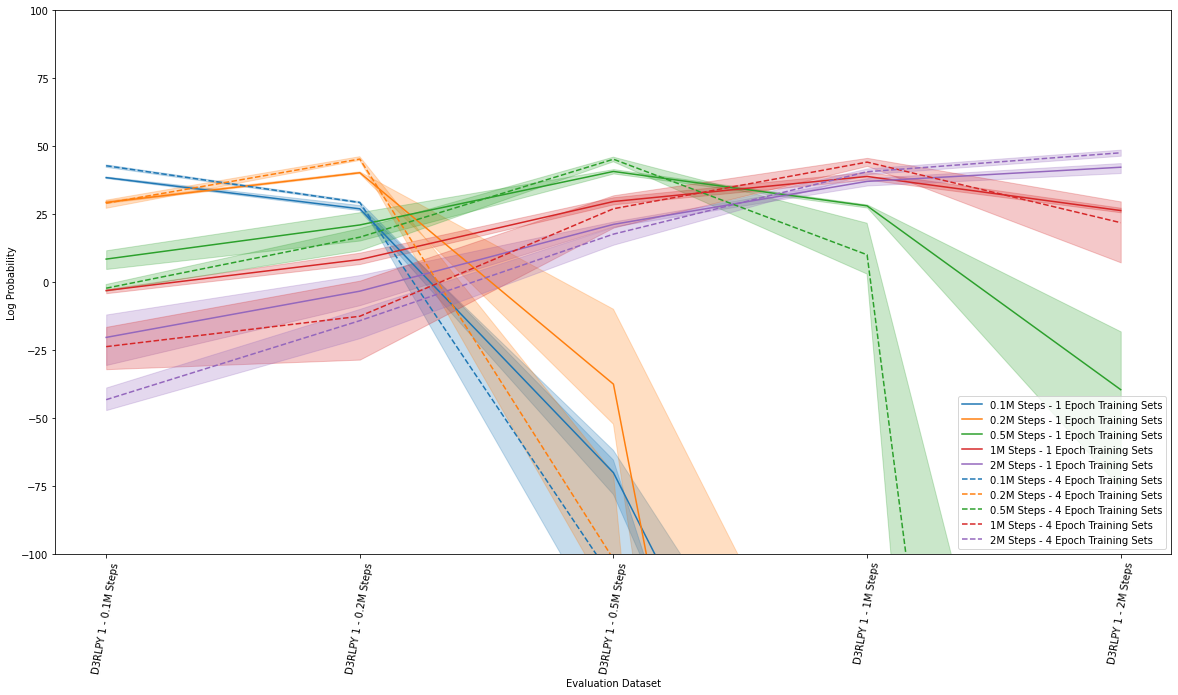

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'log_prob'
for j, exp_group in enumerate([
    [
        (scores_01_steps_avgs_df_lt, scores_01_steps_mins_df_lt, scores_01_steps_maxs_df_lt),
        (scores_02_steps_avgs_df_lt, scores_02_steps_mins_df_lt, scores_02_steps_maxs_df_lt),
        (scores_05_steps_avgs_df_lt, scores_05_steps_mins_df_lt, scores_05_steps_maxs_df_lt),
        (scores_1_steps_avgs_df_lt, scores_1_steps_mins_df_lt, scores_1_steps_maxs_df_lt),
        (scores_2_steps_avgs_df_lt, scores_2_steps_mins_df_lt, scores_2_steps_maxs_df_lt),
    ],
    [
        (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
        (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
        (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
        (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
        (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
    ],
]):
    for i, (exp_avgs, exp_mins, exp_maxs) in enumerate(exp_group):
        plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
        plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
        plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
        ax.plot(training_datasets, plot_avgs, label=f'{labels[i]} - {1 if j==0 else 4} Epoch Training Sets', c=cols[i], ls=lss[j])
        ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-100,100)
ax.legend()